In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re

In [2]:
al_results_path = '../code/results/'
results_dataset = os.listdir(al_results_path)
results_dataset

['hh130',
 'hh107',
 'hh117',
 'hh110',
 'hh104',
 'hh123',
 'hh113',
 'hh127',
 'hh109',
 'hh108',
 'hh101',
 'hh106',
 'hh102',
 'hh116',
 'hh124',
 'hh129',
 'hh126',
 'hh105',
 'hh118',
 'hh128',
 'hh114',
 'hh103',
 'hh120',
 'hh112',
 'hh111',
 'hh121',
 'hh115',
 'hh122',
 'hh119',
 'hh125']

### Loading Ens-CNN-LSTM

../ftw_model/result_new1/BiLSTM-(fib_hh117)_1d_cnn_overlook_merged_final_10_32/
../ftw_model/result_new1/BiLSTM-(fib_hh130)_1d_cnn_overlook_merged_final_10_32/


<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

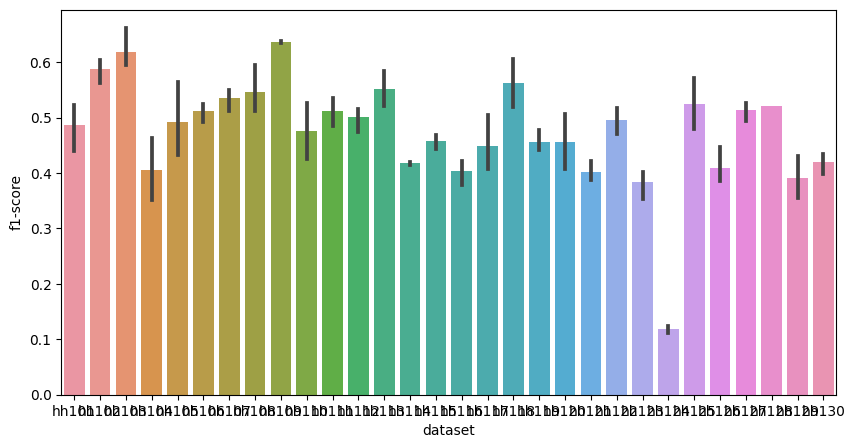

In [3]:
ftw_results_path = '../ftw_model/result_new1/'
ftw_results_dir = [os.path.join(ftw_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_1d_cnn_overlook_merged_batch_first_10_32/') for i in range(1, 31)]

ftw_dataset_f1 = []
ftw_activities = []
for result_dir in ftw_results_dir:
    # result_dir = result_dir.replace('batch_first', 'final')
    if not os.path.isdir(result_dir):
        result_dir = result_dir.replace('batch_first', 'final')
        if not os.path.isdir(result_dir):
            print(result_dir)
            result_dir = result_dir.replace('merged', 'unmerged')
            if not os.path.isdir(result_dir):
                continue
        # result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        # if not os.path.isdir(result_dir):
        #     continue
    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        # if dataset_name == 'hh101':
        #     ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0])})
        # else:
        ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})
        # ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            ftw_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(ftw_activities)
ftw_activities = ftw_activities.groupby(['dataset', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(ftw_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=ftw_data, x="dataset", y="f1-score")

### Deep CASAS result

precision     0.222222
recall        0.100000
f1-score      0.137931
support      20.000000
Name: Step_Out, dtype: float64
precision      0.519231
recall         0.574468
f1-score       0.545455
support      235.000000
Name: Toilet, dtype: float64
precision     0.200000
recall        0.028571
f1-score      0.050000
support      35.000000
Name: Phone, dtype: float64
precision      0.238095
recall         0.074627
f1-score       0.113636
support      134.000000
Name: Personal_Hygiene, dtype: float64
precision     0.958333
recall        0.707692
f1-score      0.814159
support      65.000000
Name: Leave_Home, dtype: float64
precision     0.339286
recall        0.283582
f1-score      0.308943
support      67.000000
Name: Enter_Home, dtype: float64
precision     0.0
recall        0.0
f1-score      0.0
support      37.0
Name: Relax, dtype: float64
precision     0.612903
recall        0.520548
f1-score      0.562963
support      73.000000
Name: Sleep_Out_Of_Bed, dtype: float64
precision     0.

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

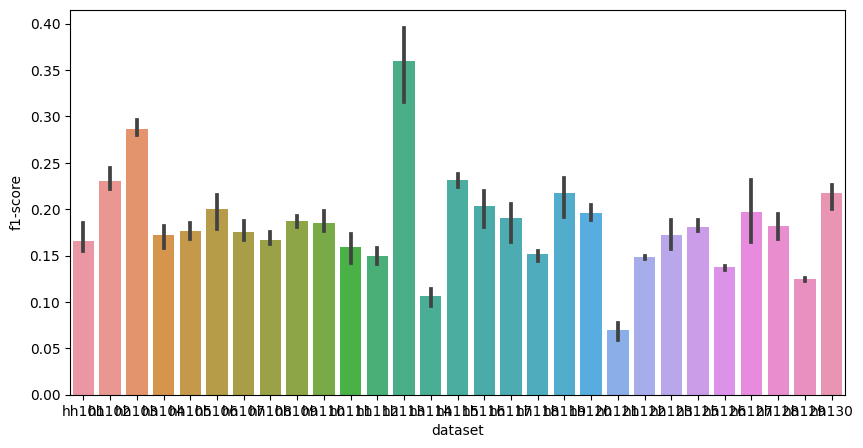

In [4]:
deep_casas_path = '../tmp/checkpoint1/'
deep_casas_link = [os.path.join(deep_casas_path, f'biLSTM-hh1{str(i) if i > 9 else "0" + str(i)}_unmerged') for i in range(1, 31)]

deep_casas_dataset_f1 = []
deep_casas_activities = []
for result_dir in deep_casas_link:
    dataset_name = result_dir.split('/')[-1].split('-')[1].replace('_unmerged', '')
    if not os.path.isdir(result_dir):
        continue
    for i in range(1, 4):
        results_path = result_dir + '/fold' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/classification_report.csv')):
            results_path = results_path + '/classification_report.csv'
        else:
            continue

        results = pd.read_csv(results_path, index_col=0, header=0)
        # deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})
    
        deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            deep_casas_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score']})
deep_casas_data = pd.DataFrame(deep_casas_dataset_f1).sort_values(by=['dataset', 'fold'])
deep_casas_activities = pd.DataFrame(deep_casas_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=deep_casas_data, x="dataset", y="f1-score")

### Read Joint-learning data

precision     0.6
recall        0.3
f1-score      0.4
support      20.0
Name: Step_Out, dtype: float64
precision      0.5929
recall         0.5038
f1-score       0.5447
support      133.0000
Name: Toilet, dtype: float64
precision     0.1818
recall        0.0800
f1-score      0.1111
support      25.0000
Name: Phone, dtype: float64
precision     0.5397
recall        0.3778
f1-score      0.4444
support      90.0000
Name: Personal_Hygiene, dtype: float64
precision     0.8462
recall        0.5593
f1-score      0.6735
support      59.0000
Name: Leave_Home, dtype: float64
precision     0.8148
recall        0.7857
f1-score      0.8000
support      56.0000
Name: Enter_Home, dtype: float64
precision     0.0392
recall        0.1200
f1-score      0.0591
support      50.0000
Name: Relax, dtype: float64
precision      0.4199
recall         0.2792
f1-score       0.3354
support      573.0000
Name: Sleep_Out_Of_Bed, dtype: float64
precision     0.7500
recall        0.2857
f1-score      0.4138
support  

,dataset,fold,activity,f1-score
0,hh101,1,Step_Out,0.4000
1,hh101,1,Toilet,0.5447
2,hh101,1,Phone,0.1111
3,hh101,1,Personal_Hygiene,0.4444
4,hh101,1,Leave_Home,0.6735
...,...,...,...,...
2929,hh130,3,Read,0.0000
2930,hh130,3,Cook_Breakfast,0.0000
2931,hh130,3,Eat_Breakfast,0.0000
2932,hh130,3,micro avg,0.6921


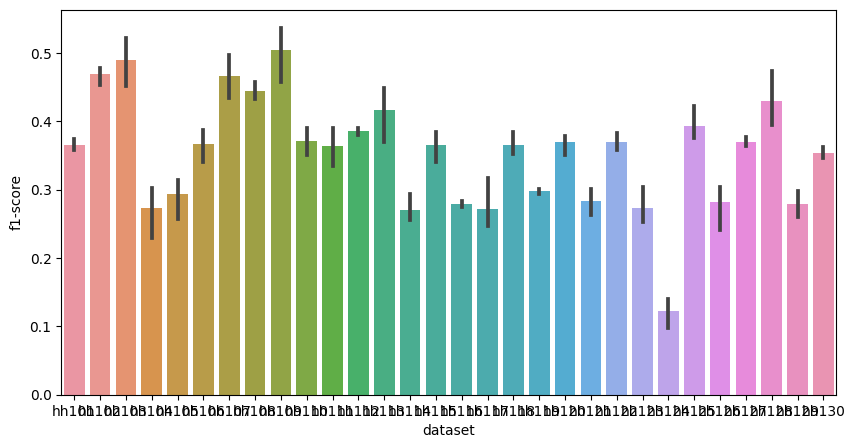

In [5]:
joint_learning_path = '../ftw_model/result_new1'
joint_learning_link = [os.path.join(joint_learning_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_joint_overlook_unmerged_10_10') for i in range(1, 31)]

joint_learning_dataset_f1 = []
joint_learning_activities = []
for result_dir in joint_learning_link:
    # find the result name in results_path using regex "hh1[0-9][0-9]"
    if not os.path.isdir(result_dir):
        print(result_dir)
    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report.txt')):
            results_path = results_path + '/report.txt'
        else:
            continue
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'
            
        results = pd.read_csv(results_path, index_col=0, header=0, sep='\t')
        joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        # joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})

        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            joint_learning_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score']})

joint_learning_data = pd.DataFrame(joint_learning_dataset_f1).sort_values(by=['dataset', 'fold'])
joint_learning_activities = pd.DataFrame(joint_learning_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=joint_learning_data, x="dataset", y="f1-score")
joint_learning_activities

### Read Ens-LSTM data

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

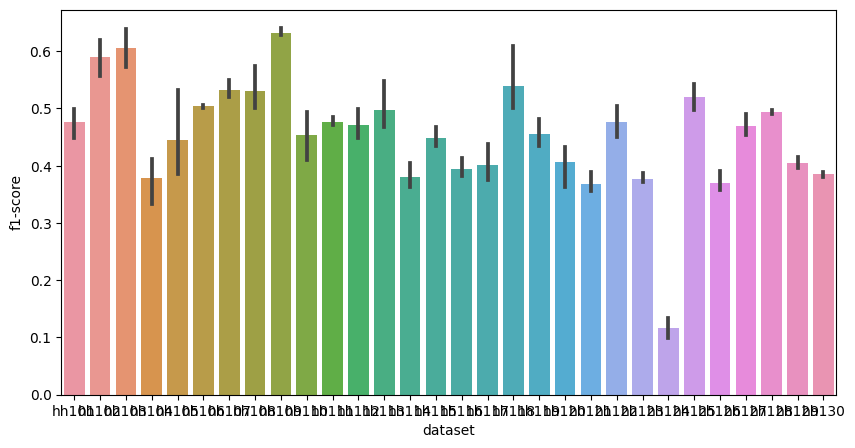

In [6]:
lstm_results_path = '../ftw_model/result_new1/'
lstm_results_dir = [os.path.join(lstm_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_mean_with_weight_overlook_merged_final_10_32/') for i in range(1, 31)]


lstm_dataset_f1 = []
lstm_activities = []
for result_dir in lstm_results_dir:
    if not os.path.isdir(result_dir):
        print(result_dir)
        result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        if not os.path.isdir(result_dir):
            continue
    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        # lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})
        lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            lstm_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
lstm_activities = pd.DataFrame(lstm_activities)
lstm_activities = lstm_activities.groupby(['dataset', 'activity']).mean().reset_index()

lstm_data = pd.DataFrame(lstm_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=lstm_data, x="dataset", y="f1-score")

In [15]:
dataset_f1 = []
al_activities = []
for dataset in results_dataset:
    for i in range(3):
        results_path = al_results_path + dataset + '/filtered_report_update_' + str(i) + '.tsv'
        if not os.path.exists(results_path):
            continue
        results = pd.read_csv(results_path, sep='\t', index_col=0)
        dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        # dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})

        # itetrating over each row and appending the activities
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            al_activities.append({'dataset': dataset, 'fold': i, 'activity': index, 'f1-score': row['f1-score']})

# take mean of f1-score for each dataset and activity from activities list
al_activities = pd.DataFrame(al_activities)
al_activities = al_activities.groupby(['dataset', 'activity']).mean().reset_index()
al_data = pd.DataFrame(dataset_f1).sort_values(by=['dataset', 'fold'])
# fig, ax = plt.subplots(figsize=(15, 5))
# sns.barplot(data=al_data, x="dataset", y="f1-score")

In [16]:
# merge the two dataframes with hue
al_data['model'] = 'AL-smarthome'
lstm_data['model'] = 'Ens-LSTM'
ftw_data['model'] = 'Ens-CNN-LSTM'
deep_casas_data['model'] = 'Deep-CASAS'
joint_learning_data['model'] = 'Joint-CNN-LSTM'

# merged_data = pd.concat([al_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)
merged_data = pd.concat([al_data, deep_casas_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)

# filter hh113, hh115, hh117, hh106, hh130
# merged_data = merged_data[~merged_data['dataset'].isin(['hh113', 'hh115', 'hh117', 'hh106', 'hh130'])]

# filter the hh124 dataset
merged_data = merged_data[merged_data['dataset'] != 'hh124']

In [17]:
# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='first')
max_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
max_merged_data['f1-score'] = max_merged_data['f1-score'].astype(str) + ' (' + max_merged_data['dataset'] + ')'
max_merged_data = max_merged_data[['model', 'f1-score']].set_index('model')

# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='last')
min_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
min_merged_data['f1-score'] = min_merged_data['f1-score'].astype(str) + ' (' + min_merged_data['dataset'] + ')'
min_merged_data = min_merged_data[['model', 'f1-score']].set_index('model')

In [18]:
# sort by f1-score# get the average f1-score, precision and recall for each model and their confidence interval
merged_data_out = merged_data.groupby(['model']).agg({'f1-score': ['mean', 'std'], 'precision': ['mean', 'std'], 'recall': ['mean', 'std']})
merged_data_out.columns = ['f1-score', 'f1-score-std', 'precision', 'precision-std', 'recall', 'recall-std']

# calculate the confidence interval
merged_data_out['f1-score-std'] = merged_data_out['f1-score-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['precision-std'] = merged_data_out['precision-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['recall-std'] = merged_data_out['recall-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96

# output the score with add minus std
merged_data_out['f1-score'] = merged_data_out['f1-score'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['f1-score-std'].round(3).astype(str)
merged_data_out['precision'] = merged_data_out['precision'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['precision-std'].round(3).astype(str)
merged_data_out['recall'] = merged_data_out['recall'].round(4).astype(str) + ' $\\pm$' + merged_data_out['recall-std'].round(3).astype(str)

# drop std columns
merged_data_out = merged_data_out.drop(columns=['f1-score-std', 'precision-std', 'recall-std'])

# sort the models
merged_data_out = merged_data_out.reindex(['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'])

# concat the min and max f1-score as new columns
merged_data_out['Max-F1'] = max_merged_data['f1-score']
merged_data_out['Min-F1'] = min_merged_data['f1-score']

# rename the column as captial first letter
merged_data_out = merged_data_out.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall'})

# merged_data_out['F1-Score'] = merged_data_out['F1-Score'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['F1-Score'].max() else x)
# merged_data_out['Precision'] = merged_data_out['Precision'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Precision'].max() else x)
# merged_data_out['Recall'] = merged_data_out['Recall'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Recall'].max() else x)
# # drop fold column
# # merged_data_out = merged_data_out.drop(columns=['fold'])
# # bold the column name
# merged_data_out.columns = ['\\textbf{' + col + '}' for col in merged_data_out.columns]

# print(merged_data_out.to_latex(escape=False))
# # # merged_data_out
# sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# # drop duplicate model
# sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='first')
# max_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# # concat the f1-score and the dataset
# max_merged_data['f1-score'] = max_merged_data['f1-score'].astype(str) + ' (' + max_merged_data['dataset'] + ')'
# max_merged_data = max_merged_data[['model', 'f1-score']].set_index('model')
# max_merged_data
merged_data_out

,F1-Score,Precision,Recall,Max-F1,Min-F1
model,,,,,
AL-smarthome,0.4625 $\pm$ 0.032,0.4933 $\pm$ 0.031,0.4871 $\pm$0.03,0.7151 (hh103),0.2564 (hh104)
Deep-CASAS,0.1841 $\pm$ 0.02,0.2312 $\pm$ 0.023,0.1882 $\pm$0.02,0.3952 (hh113),0.0594 (hh121)
Joint-CNN-LSTM,0.3607 $\pm$ 0.027,0.4595 $\pm$ 0.028,0.3316 $\pm$0.025,0.5363 (hh109),0.2294 (hh104)
Ens-LSTM,0.4644 $\pm$ 0.028,0.5153 $\pm$ 0.028,0.4566 $\pm$0.027,0.6405 (hh109),0.3329 (hh104)
Ens-CNN-LSTM,0.4853 $\pm$ 0.027,0.5482 $\pm$ 0.027,0.4707 $\pm$0.027,0.6614 (hh103),0.3519 (hh104)
